In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [67]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [64]:
june_over_perc = ts((june_over$series/june_over$total)[49:(672)], frequency=24)
june_under_perc = ts((june_under$series/june_under$total)[49:(672)], frequency=24)

In [72]:
ut = sum(june_under$series)

In [73]:
 ot = sum(june_over$series)

In [74]:
ut/(ut+ot)

[1] 0.3104449

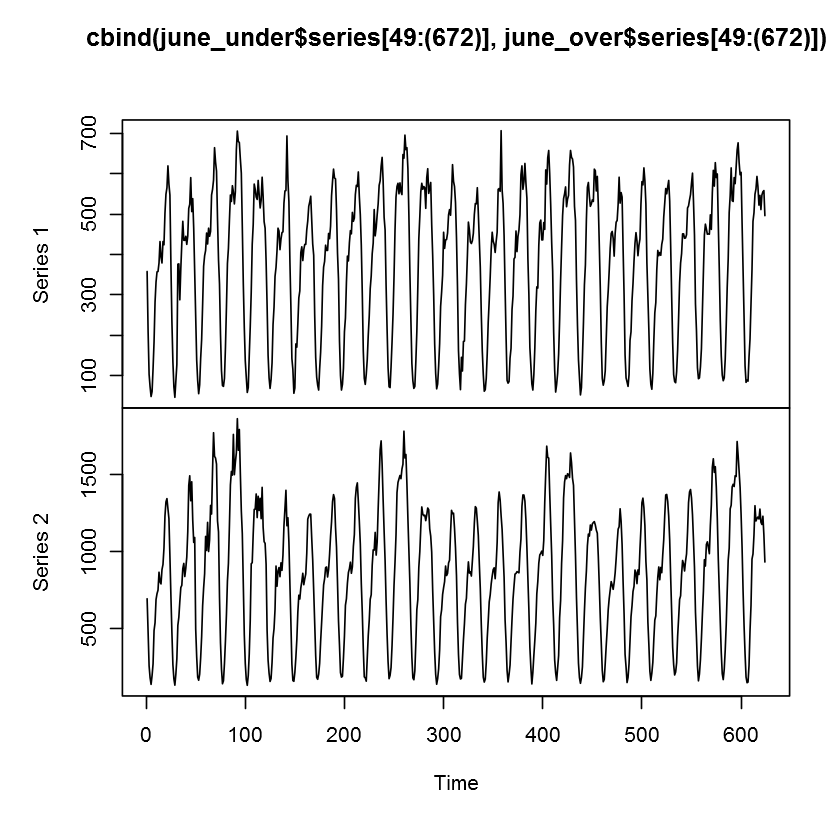

In [69]:
plot.ts(cbind(june_under$series[49:(672)], june_over$series[49:(672)]))

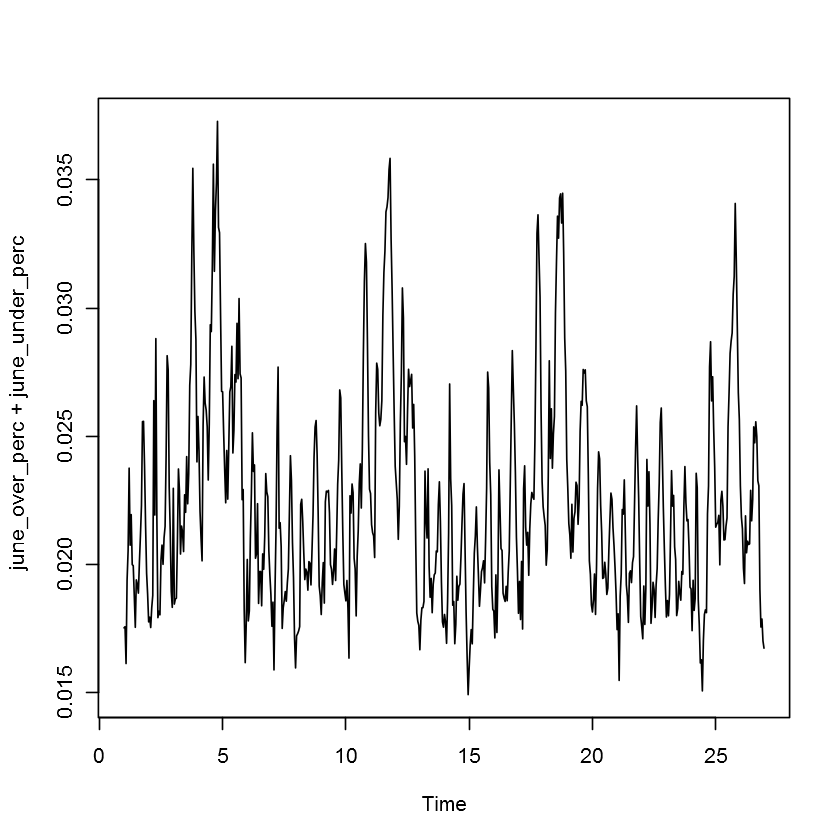

In [13]:
plot.ts(june_over_perc + june_under_perc)

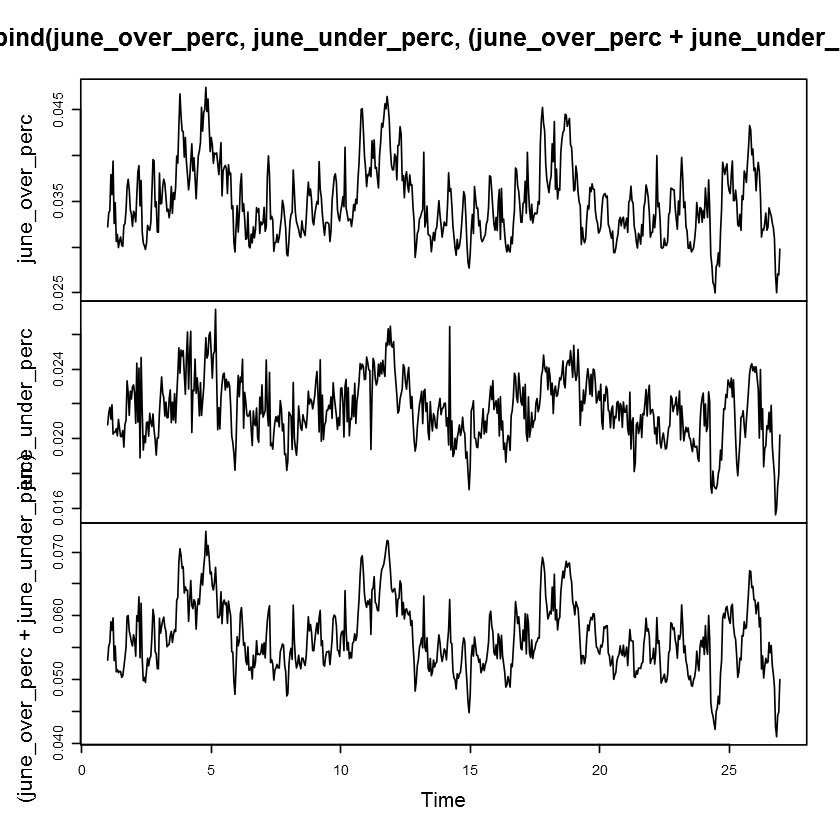

In [62]:
plot.ts(cbind(june_over_perc, june_under_perc, (june_over_perc+june_under_perc)))

In [29]:
jo = june_over$series[49:672]
ju = june_under$series[49:672]

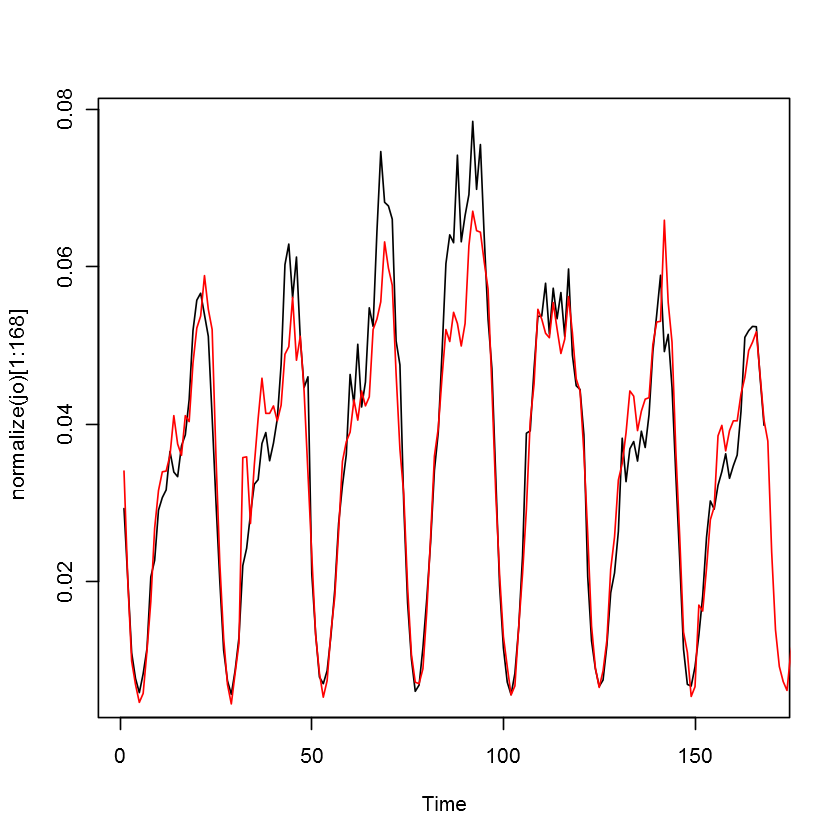

In [63]:
plot.ts(normalize(jo)[1:168])
lines(normalize(ju), col='red')

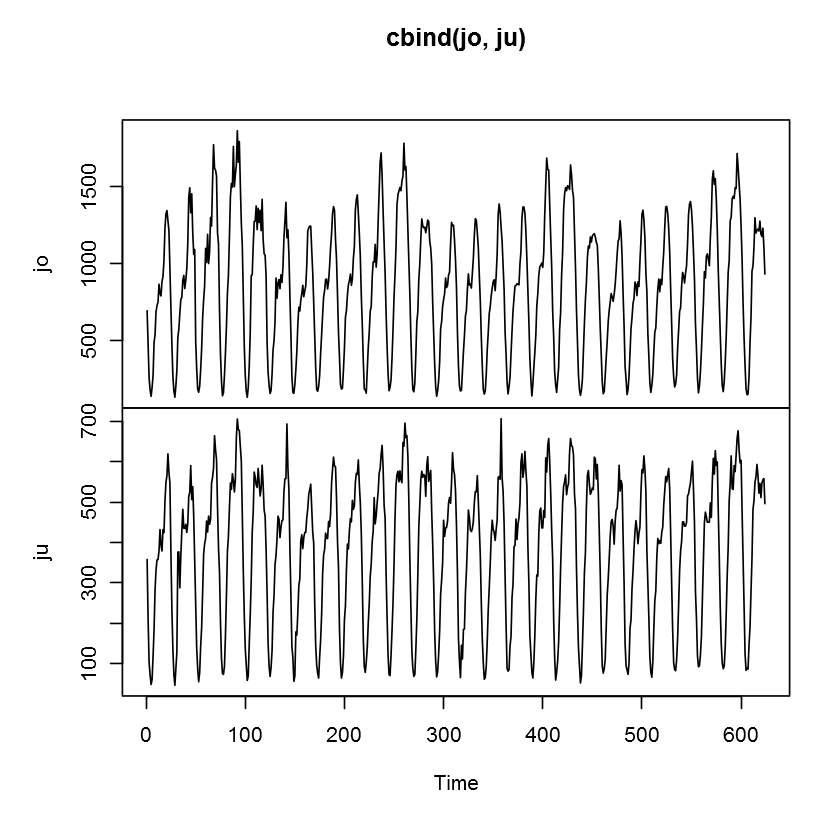

In [36]:
plot.ts(cbind(jo, ju))

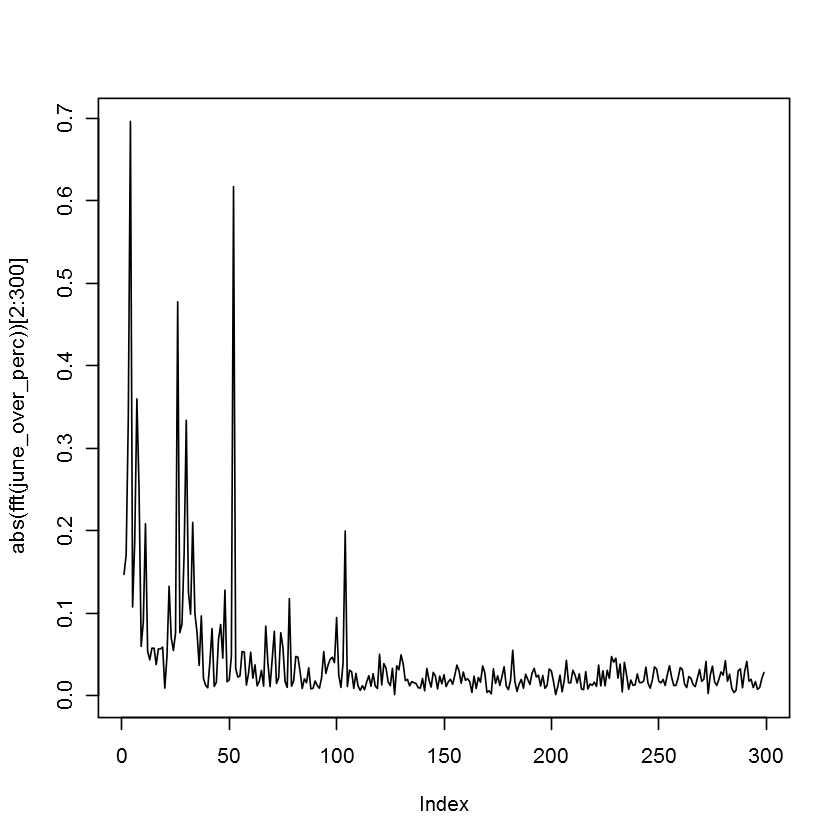

In [49]:
plot(abs(fft(june_over_perc))[2:300], type='l')

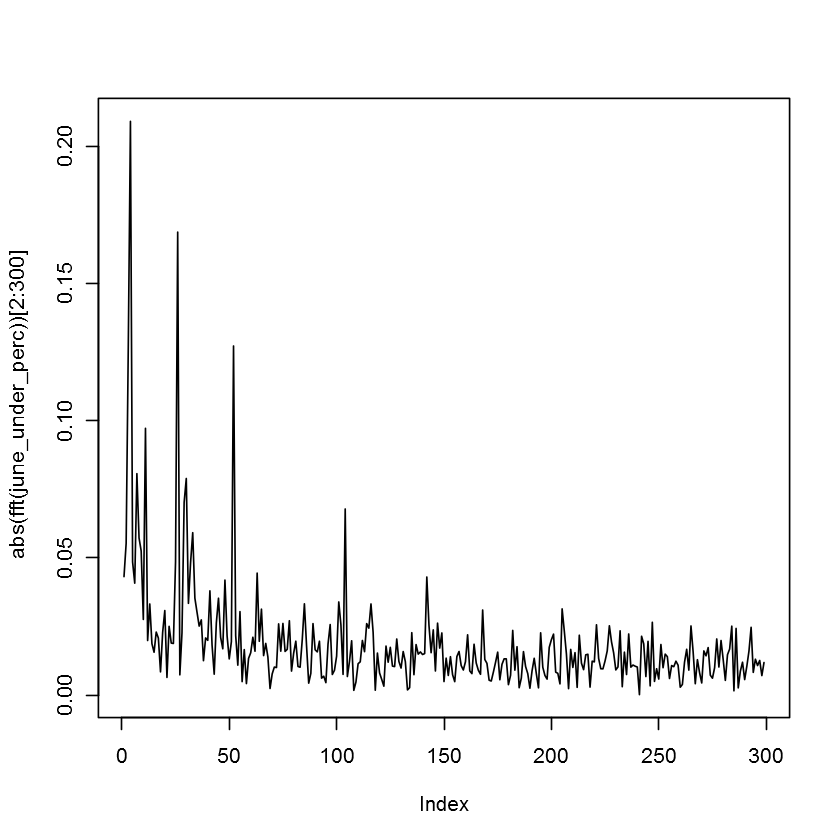

In [50]:
plot(abs(fft(june_under_perc))[2:300], type='l')

In [51]:
phase_dist(4)(jo, ju)

[1] 0.04430986

In [27]:
phase_dist <- function(freq){
    # gives dft phase distance function at a frequency
    return (function(ts1, ts2){
        # phase of freq from fft
        f1 = fft(ts1)[freq+1]
        f2 = fft(ts2)[freq+1]
        return (abs(Arg(f1/f2))/(2*pi))
        })
    
}

In [28]:
dissimilarity <- function(m_ts, f){
    # calc dissimilarity matrix of list of time series given a distance function
    n = ncol(m_ts)
    mdiss = matrix(nrow=n, ncol=n)
    for (i in 1:n){
        for (j in 1:n){
            mdiss[i, j] = f(m_ts[,i], m_ts[,j])
        }
    }
     return (mdiss)       
}

In [41]:
normalize <- function(ts){
    return(ts/norm(ts, type='2'))
}